## 1. Case Description

A heart study dataset is a collection of data that is used to study the characteristics of breast cancer, including information on demographics, medical history, lifestyle factors, and the characteristics of the cancer itself. The dataset can include a wide range of information such as patient demographics, including age, gender, race, and family history, as well as information on the stage, grade, and size of the cancer, and the results of diagnostic tests such as mammography, ultrasound, and biopsy.


## 2. Objective

- Predict whether the patient has heart disease or not

## 3. Machine learning process

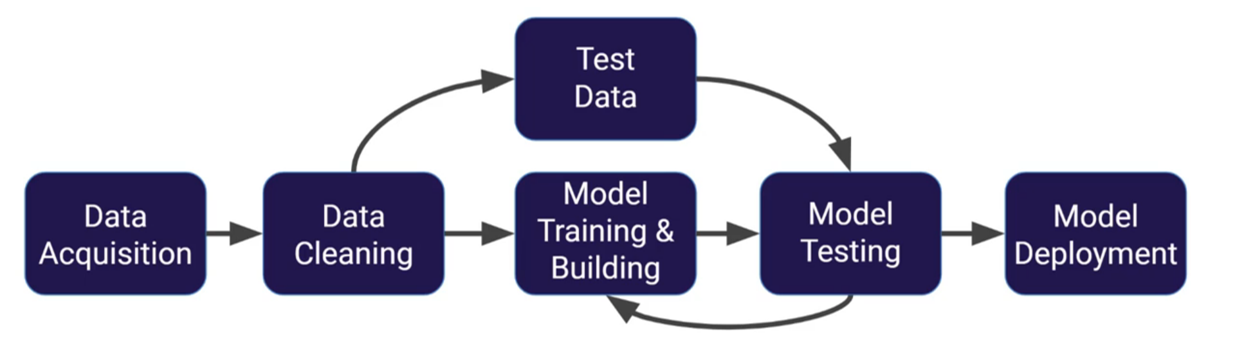

## Import libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset

In [32]:
df = pd.read_excel("(Train) framingham_heart_disease.xlsx")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
2,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
3,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
4,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0


In [33]:
df.shape

(4230, 16)

In [34]:
df['education'].value_counts(dropna = False)

1.0    1718
2.0    1248
3.0     686
4.0     473
NaN     105
Name: education, dtype: int64

## Data preprocessing

In [35]:
# Check missing data
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

remove row with NaN data

In [36]:
df = df.dropna(0)
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
LE = LabelEncoder()
df['male']=LE.fit_transform(df['male'])

## Feature Selection

<AxesSubplot:>

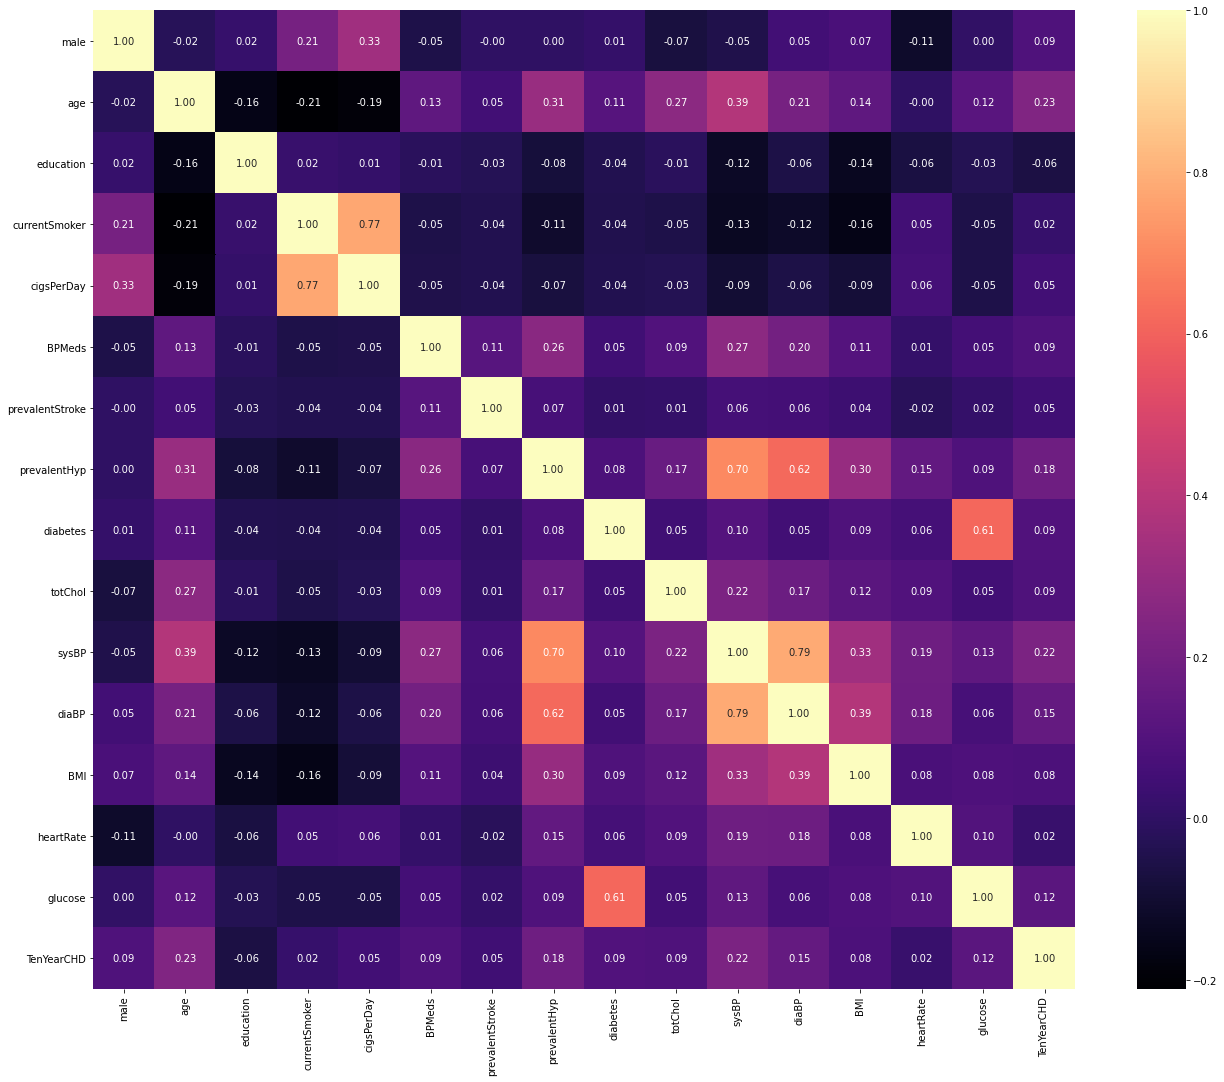

In [39]:
# Correlation heatmap
plt.figure(figsize=(22,18))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [40]:
df1 = df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
df1

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
2,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
3,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
4,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4223,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4224,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4227,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4228,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


## Model Training

In [41]:
X = df1.iloc[:, :15]
y = df1.iloc[:,-1]

Split the dataset into train and validation data

In [42]:
#Preparing the model
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 99)

Hyperparameter tuning

In [53]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

from sklearn.linear_model import LogisticRegression
lc = LogisticRegression(C=1, penalty='l1')

param_dict = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], # Penalty, default = 'l2'
              'C' : np.logspace(-2, 2, 10), # regularization strength, default = 1.0
              'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'], #solver, default = 'lbfgs'
              'max_iter' : [100, 1000]} # default = '100'

grid = GridSearchCV(lc, param_grid=param_dict, cv=cv)
grid.fit(X_train, y_train)

grid.best_params_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

{'C': 0.21544346900318834,
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'lbfgs'}

Model evaluation

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=100, max_iter = 100, penalty = 'l1', solver = 'liblinear')
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8753424657534247

In [45]:
y_train_pred = model.predict(X_test)

<AxesSubplot:>

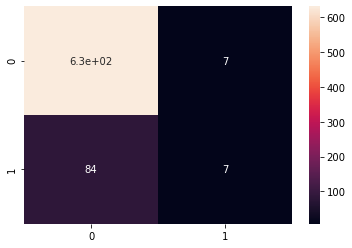

In [46]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

cm = confusion_matrix(y_test, y_train_pred)

sns.heatmap(cm, annot = True)

## New case

In [47]:
DT = pd.read_excel("New_case_framingham_heart_disease.xlsx")
DT

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,46,2,0,0,0,0,0,0,250,121,81,28.73,95,76,0
1,0,46,3,1,23,0,0,0,0,285,130,84,23.10,85,85,0
2,0,60,1,0,0,0,0,0,0,247,130,88,30.36,72,74,0
3,0,35,2,0,0,0,0,0,0,135,105,69,22.88,70,76,0
4,0,50,2,1,20,0,0,0,0,275,123,83,24.29,90,64,0
5,0,63,1,0,0,0,0,0,0,205,138,71,33.11,60,85,1
6,1,50,2,0,0,0,0,0,0,296,129,85,25.86,56,106,1
7,1,39,2,1,30,0,0,0,0,257,118,76,22.92,73,76,1
8,0,45,3,1,10,0,0,0,0,210,121,82,23.08,85,71,1
9,1,60,3,1,10,0,0,1,0,250,157,94,29.89,63,68,1


In [48]:
DT['TenYearCHD']=LE.fit_transform(DT['TenYearCHD'])

In [49]:
DT1 = DT[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]

X_new = DT1.iloc[:, :15]
y_new = DT1.iloc[:,:-1]

In [50]:
DT1

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,46,2,0,0,0,0,0,0,250,121,81,28.73,95,76,0
1,0,46,3,1,23,0,0,0,0,285,130,84,23.10,85,85,0
2,0,60,1,0,0,0,0,0,0,247,130,88,30.36,72,74,0
3,0,35,2,0,0,0,0,0,0,135,105,69,22.88,70,76,0
4,0,50,2,1,20,0,0,0,0,275,123,83,24.29,90,64,0
5,0,63,1,0,0,0,0,0,0,205,138,71,33.11,60,85,1
6,1,50,2,0,0,0,0,0,0,296,129,85,25.86,56,106,1
7,1,39,2,1,30,0,0,0,0,257,118,76,22.92,73,76,1
8,0,45,3,1,10,0,0,0,0,210,121,82,23.08,85,71,1
9,1,60,3,1,10,0,0,1,0,250,157,94,29.89,63,68,1


In [51]:
y_pred = model.predict(X_new)

In [52]:
diag = []
for i in range(len(y_pred)):
  if y_pred[i] == 1:
    diag.append('1')
  else:
    diag.append('0')

diag = pd.DataFrame(diag, columns = ['TenYearCHD_pred'])
diag

,TenYearCHD_pred
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
